# Name : Parth Bhalani
# Student ID : 23005402

In [107]:
# import necessary libraries
import numpy as np
import pandas as pd 
import scipy.stats as ss
import statistics
import plotly.express as px
import plotly.graph_objects as go
from scipy.stats import skew
from scipy.stats import kurtosis
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
import random
import warnings

In [3]:
# Load our top world companies data using pandas and store in df
df = pd.read_csv("Data/companies.csv")
df.head()                              # print the first data sets

,Company_name,Description,Ratings,Highly_rated_for,Critically_rated_for,Total_reviews,Avg_salary,Interviews_taken,Total_jobs_available,Total_benefits
0,TCS,IT Services & Consulting | 1 Lakh+ Employees |...,3.8,"Job Security, Work Life Balance","Promotions / Appraisal, Salary & Benefits",73.1k,856.9k,6.1k,847,11.5k
1,Accenture,IT Services & Consulting | 1 Lakh+ Employees |...,4.0,"Company Culture, Skill Development / Learning,...",NaN,46.4k,584.6k,4.3k,9.9k,7.1k
2,Cognizant,IT Services & Consulting | 1 Lakh+ Employees |...,3.9,Skill Development / Learning,Promotions / Appraisal,41.7k,561.5k,3.6k,460,5.8k
3,Wipro,IT Services & Consulting | 1 Lakh+ Employees |...,3.8,Job Security,"Promotions / Appraisal, Salary & Benefits",39.2k,427.4k,3.7k,405,5k
4,Capgemini,IT Services & Consulting | 1 Lakh+ Employees |...,3.9,"Job Security, Work Life Balance, Skill Develop...","Promotions / Appraisal, Salary & Benefits",34k,414.4k,2.8k,719,4k


In [4]:
# first we see the information about datasets 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Company_name          10000 non-null  object 
 1   Description           10000 non-null  object 
 2   Ratings               10000 non-null  float64
 3   Highly_rated_for      9908 non-null   object 
 4   Critically_rated_for  2807 non-null   object 
 5   Total_reviews         10000 non-null  object 
 6   Avg_salary            10000 non-null  object 
 7   Interviews_taken      10000 non-null  object 
 8   Total_jobs_available  10000 non-null  object 
 9   Total_benefits        10000 non-null  object 
dtypes: float64(1), object(9)
memory usage: 781.4+ KB


###### obeservation : There are 2 types of data and 10 columns and 10000 rows.There are missing value in Highly_rated_for and Critically_rated_for

In [5]:
# check how many misssing value in data sets
df.isnull().sum()

Company_name               0
Description                0
Ratings                    0
Highly_rated_for          92
Critically_rated_for    7193
Total_reviews              0
Avg_salary                 0
Interviews_taken           0
Total_jobs_available       0
Total_benefits             0
dtype: int64

<Axes: >

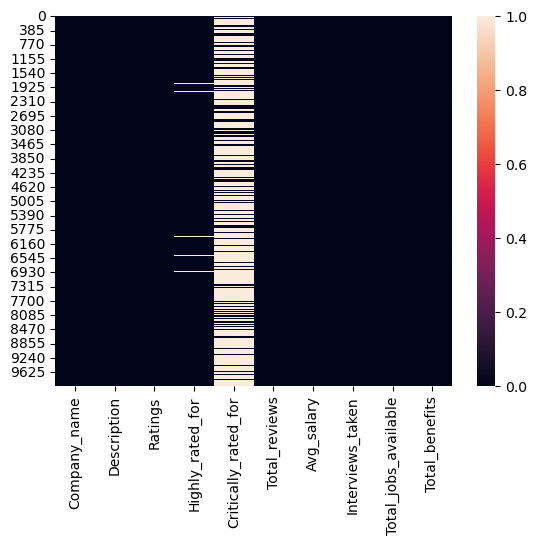

In [6]:
# check using the visualization
sns.heatmap(df.isnull())

### In Highly_rated_for 92 missing value  and Critically _rated_for 7193 missing value.

In [7]:
# Now we fill the missing value with mode of columns data because of data is categories.
df['Highly_rated_for']=df['Highly_rated_for'].fillna(df['Highly_rated_for'].mode()[0])  
df['Critically_rated_for'].fillna(df['Critically_rated_for'].mode()[0],inplace = True) # inplace = True means changes apply in main datasets

In [8]:
# now we see is there any missing value in data 
df.isnull().sum()

Company_name            0
Description             0
Ratings                 0
Highly_rated_for        0
Critically_rated_for    0
Total_reviews           0
Avg_salary              0
Interviews_taken        0
Total_jobs_available    0
Total_benefits          0
dtype: int64

In [9]:
# converting k to 1000
columns_to_convert = ['Total_reviews', 'Avg_salary', 'Interviews_taken', 'Total_jobs_available', 'Total_benefits']

for col in columns_to_convert:
    # Remove 'k' then multiply by 1000
     df[col] = pd.to_numeric(df[col].astype(str).str.replace('k', ''), errors='coerce').fillna(0) * 1000
        
        
df.head()

,Company_name,Description,Ratings,Highly_rated_for,Critically_rated_for,Total_reviews,Avg_salary,Interviews_taken,Total_jobs_available,Total_benefits
0,TCS,IT Services & Consulting | 1 Lakh+ Employees |...,3.8,"Job Security, Work Life Balance","Promotions / Appraisal, Salary & Benefits",73100.0,856900.0,6100.0,847000.0,11500.0
1,Accenture,IT Services & Consulting | 1 Lakh+ Employees |...,4.0,"Company Culture, Skill Development / Learning,...",Promotions / Appraisal,46400.0,584600.0,4300.0,9900.0,7100.0
2,Cognizant,IT Services & Consulting | 1 Lakh+ Employees |...,3.9,Skill Development / Learning,Promotions / Appraisal,41700.0,561500.0,3600.0,460000.0,5800.0
3,Wipro,IT Services & Consulting | 1 Lakh+ Employees |...,3.8,Job Security,"Promotions / Appraisal, Salary & Benefits",39200.0,427400.0,3700.0,405000.0,5000.0
4,Capgemini,IT Services & Consulting | 1 Lakh+ Employees |...,3.9,"Job Security, Work Life Balance, Skill Develop...","Promotions / Appraisal, Salary & Benefits",34000.0,414400.0,2800.0,719000.0,4000.0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Company_name          10000 non-null  object 
 1   Description           10000 non-null  object 
 2   Ratings               10000 non-null  float64
 3   Highly_rated_for      10000 non-null  object 
 4   Critically_rated_for  10000 non-null  object 
 5   Total_reviews         10000 non-null  float64
 6   Avg_salary            10000 non-null  float64
 7   Interviews_taken      10000 non-null  float64
 8   Total_jobs_available  10000 non-null  float64
 9   Total_benefits        10000 non-null  float64
dtypes: float64(6), object(4)
memory usage: 781.4+ KB


#### Now our Data is ready for Visualizations

In [11]:
### Now we see some statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Ratings,10000.0,3.89471,0.385894,1.3,3.7,3.9,4.1,5.0
Total_reviews,10000.0,194255.55000,177098.055284,1000.0,88000.0,129000.0,235000.0,999000.0
Avg_salary,10000.0,338194.93000,317838.274341,0.0,2700.0,342000.0,593000.0,999000.0
Interviews_taken,10000.0,19996.36000,47477.850724,0.0,4000.0,8000.0,17000.0,972000.0
Total_jobs_available,10000.0,17313.79000,54564.260892,0.0,0.0,2000.0,13000.0,981000.0
Total_benefits,10000.0,42916.65000,81710.594233,0.0,11000.0,18000.0,38000.0,973000.0


In [61]:
mask_numeric = df.dtypes == float
df_numerical = df.loc[:, mask_numeric]

In [117]:
# we calculate the mean, median, mode 
def statistics(df):
    print(f'The mean of thr data : {df_numerical.mean()}')
    print(f'The median of data :{df_numerical.median()}')
    print(f'The mode of data: {ss.mode(df_numerical)}')

    
    
    return()

In [118]:
statistics(df)
warnings.filterwarnings('ignore', category=FutureWarning)

The mean of thr data : Ratings                      3.89471
Total_reviews           194255.55000
Avg_salary              338194.93000
Interviews_taken         19996.36000
Total_jobs_available     17313.79000
Total_benefits           42916.65000
dtype: float64
The median of data :Ratings                      3.9
Total_reviews           129000.0
Avg_salary              342000.0
Interviews_taken          8000.0
Total_jobs_available      2000.0
Total_benefits           18000.0
dtype: float64
The mode of data: ModeResult(mode=array([[4.0e+00, 7.5e+04, 1.1e+03, 4.0e+03, 0.0e+00, 1.0e+04]]), count=array([[1188,  147,  321,  805, 3923,  396]]))


In [93]:
# correlation
Corr_Matrix = round(df_numerical.corr(),2)
print(Corr_Matrix)

                      Ratings  Total_reviews  Avg_salary  Interviews_taken  \
Ratings                  1.00           0.05       -0.08              0.01   
Total_reviews            0.05           1.00       -0.36              0.01   
Avg_salary              -0.08          -0.36        1.00             -0.28   
Interviews_taken         0.01           0.01       -0.28              1.00   
Total_jobs_available    -0.07           0.02       -0.16              0.34   
Total_benefits           0.10           0.04       -0.33              0.71   

                      Total_jobs_available  Total_benefits  
Ratings                              -0.07            0.10  
Total_reviews                         0.02            0.04  
Avg_salary                           -0.16           -0.33  
Interviews_taken                      0.34            0.71  
Total_jobs_available                  1.00            0.29  
Total_benefits                        0.29            1.00  


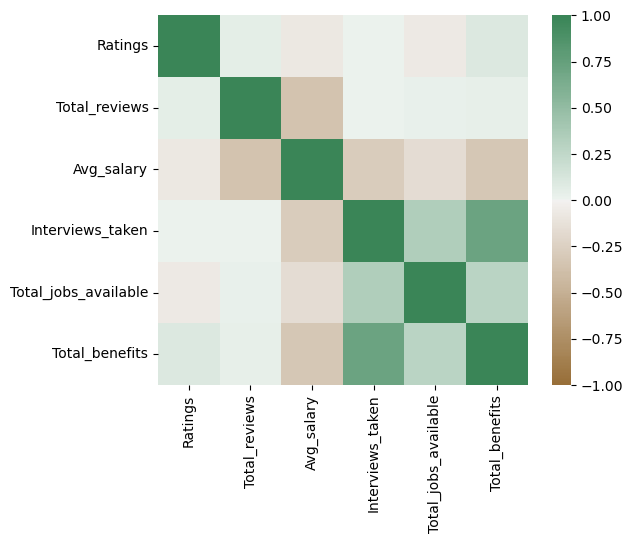

In [91]:
# visualization of correlation
df_numerical_corr = df_numerical.corr()

axis_corr = sns.heatmap(
df_numerical_corr,
vmin=-1, vmax=1, center=0,
cmap=sns.diverging_palette(50, 500, n=500),
square=True
)

plt.show()


In [67]:
# Standard Deviation
np.std(df_numerical)

Ratings                      0.385874
Total_reviews           177089.200160
Avg_salary              317822.382030
Interviews_taken         47475.476772
Total_jobs_available     54561.532611
Total_benefits           81706.508601
dtype: float64

In [68]:
# kurtosis and skwness
print(f'skewness: {skew(df_numerical, axis=0, bias=True)}')
print(f'Kurtosis: {kurtosis(df_numerical, axis=0, bias=True)}')


skewness: [-0.64276532  2.04933893  0.33557614  8.30109318  8.4325959   5.3473401 ]
Kurtosis: [  1.43809565   4.44773909  -1.24728614 101.96719217  97.03502001
  36.98826188]


In [69]:
# Now we are looking for visualizations 

In [70]:
# Distribution Of Rating so we created Histogram 
def hist_plot(df,feature):
    """
        Create a histogram for rating distribution
    """
    plt.figure(figsize=(10,6),dpi=144)
    
    sns.histplot(df[feature],bins=20,kde=True)
    plt.title("Distribution of Company Rating")
    plt.xlabel("Rating")
    plt.ylabel("Frequency")
    plt.show()  
    return
               

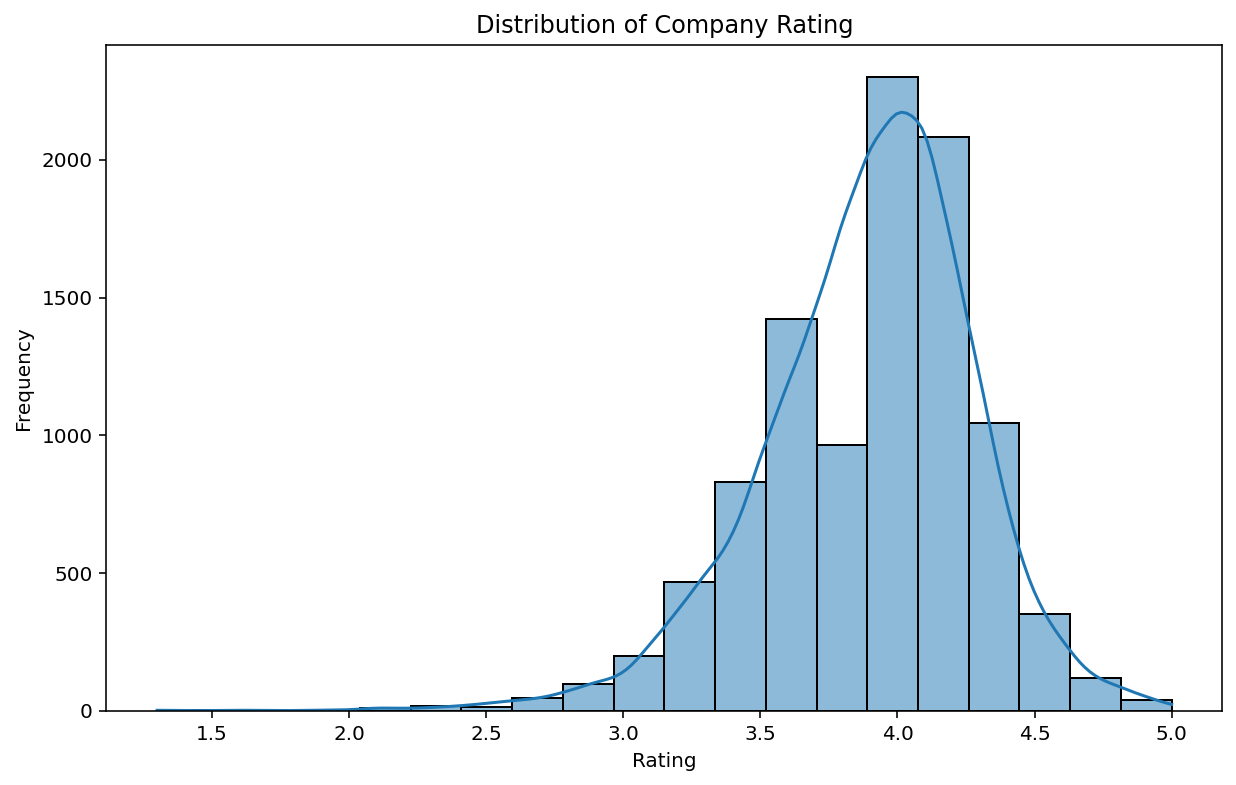

In [71]:
hist_plot(df,"Ratings")

## 2. Scatter Plot

In [72]:

def scatter(df,feature1,feature2):
    """
    Create the scatter plot between the Ratings and Avg_salary
    """
    plt.figure(figsize=(10,6),dpi=144)
    
    plt.scatter(df[feature1],df[feature2])
    plt.xlabel("Ratings")
    plt.ylabel("Avg_salary")
    plt.title("Ratings and Avg_salary")
    plt.show()
    return()

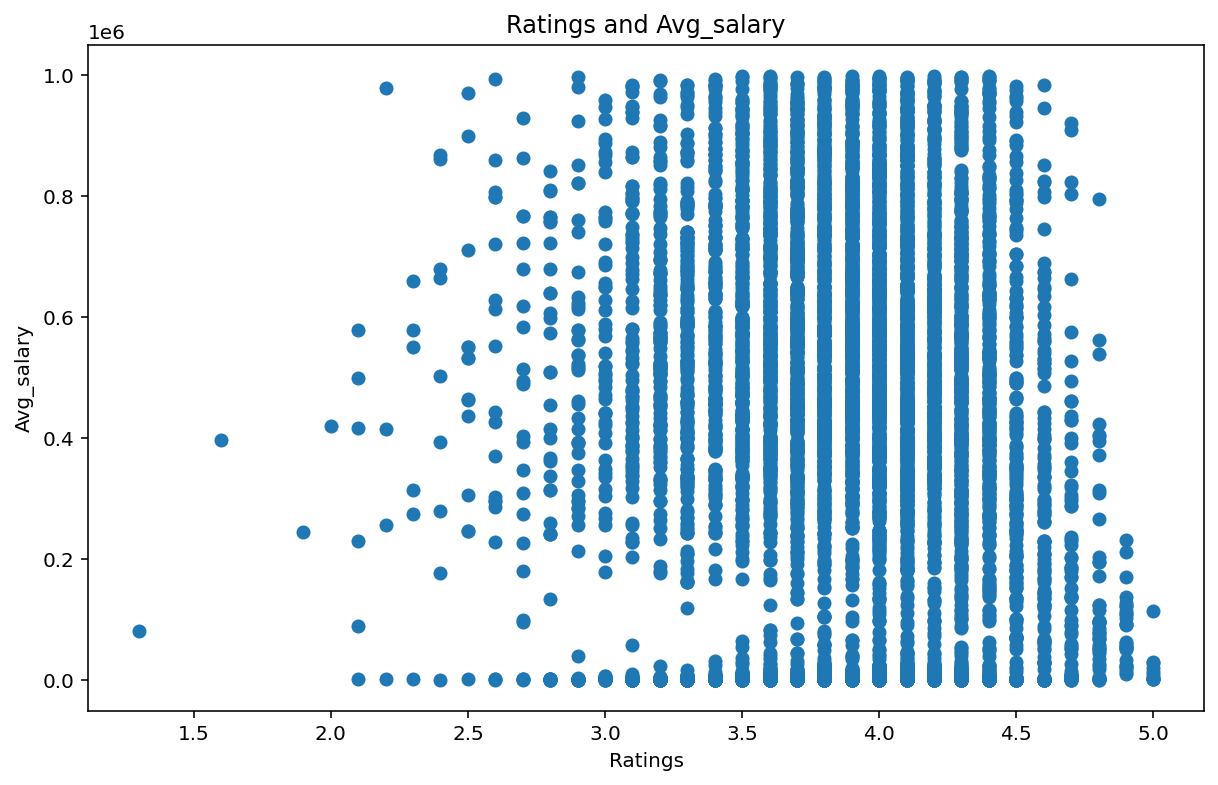

()

In [73]:
scatter(df,"Ratings","Avg_salary")

## 3. Line Plot

In [102]:
def line_plot(df):
    """
    Create the line plot between the Company name  and Total jobs avilable
    """
    plt.figure(dpi=144)
    
    sns.lineplot(x=df['Company_name'].head(6),y=df['Total_jobs_available'])
    plt.title('Line plot of Company vs Total_jobs_available')
    plt.show()
    return


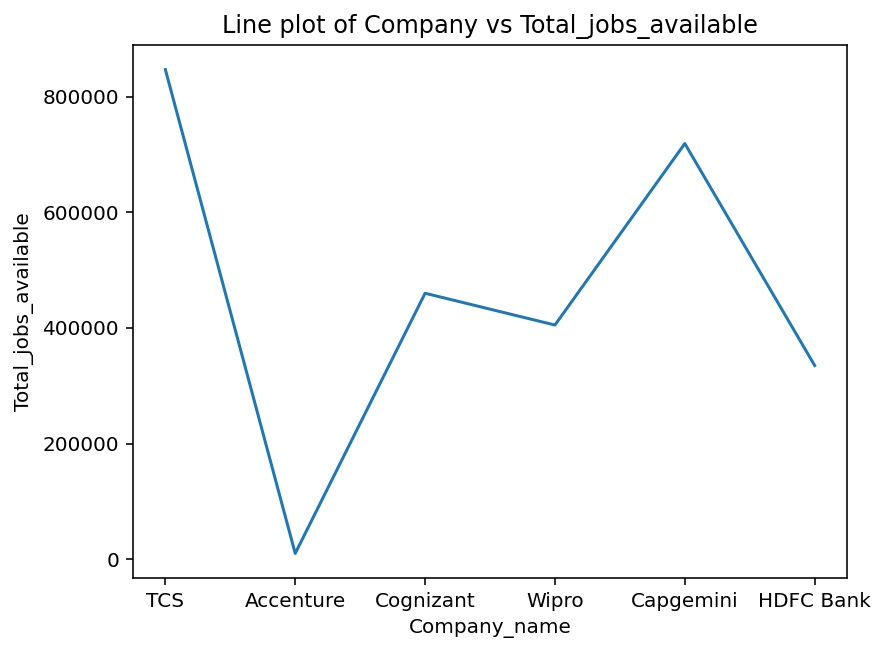

In [76]:
line_plot(df)

## 4. Box Plot

In [121]:
def box_plot(df):
    """
    Create the box plot for Ratings 
    """
    plt.figure(dpi=144)
    
    plt.boxplot(df['Ratings'])
    plt.title('Ratings')
    plt.show()
    return


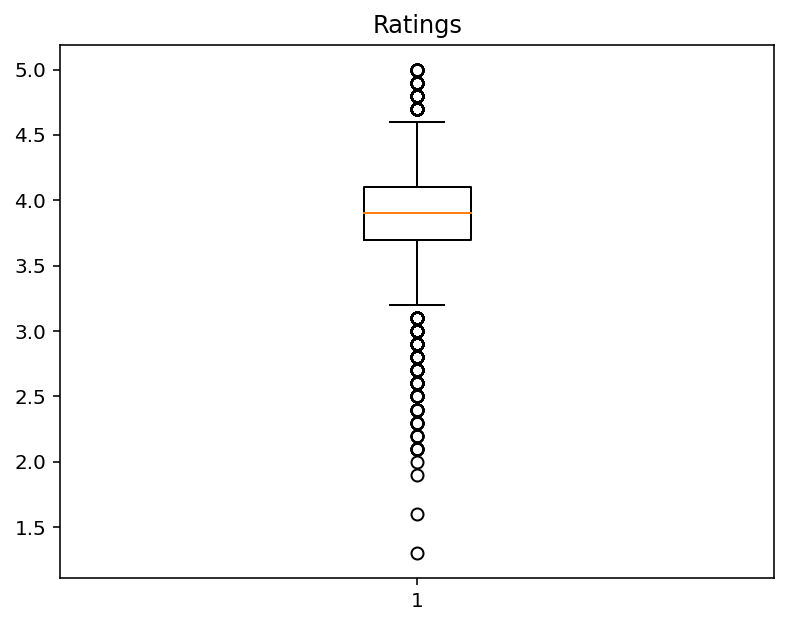

In [122]:
box_plot(df)

## 5.Word Count

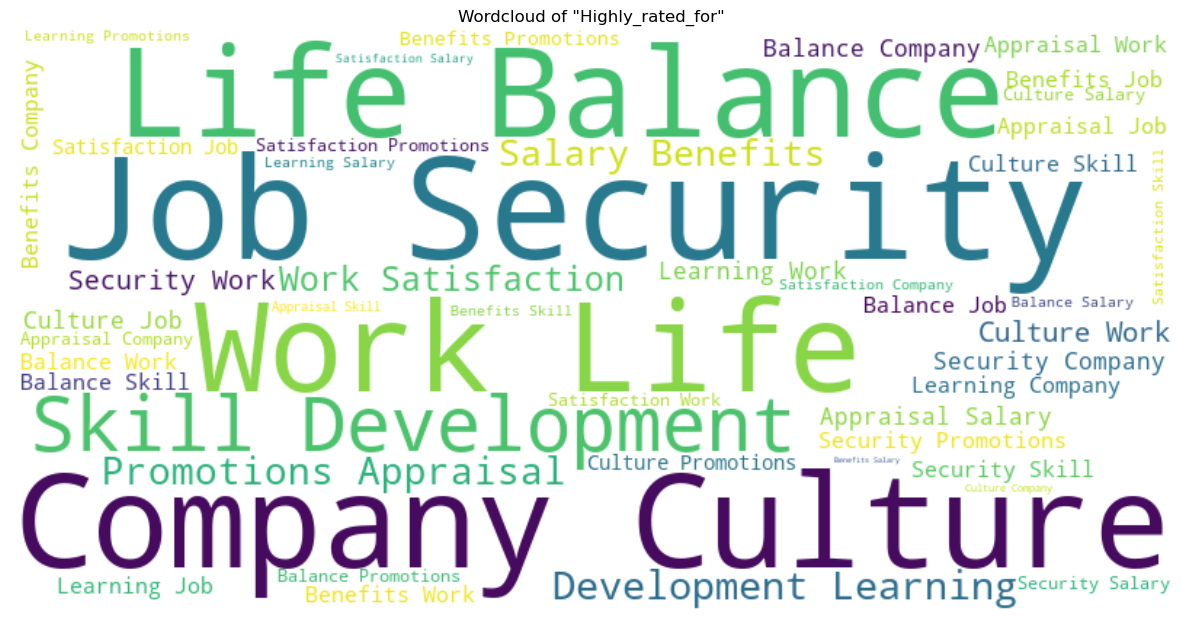

In [82]:
from wordcloud import WordCloud
all_texts = ' '.join(df['Highly_rated_for'].dropna())


wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_texts)

plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Wordcloud of "Highly_rated_for"')
plt.show()

## 6. Heat Map

In [123]:
df_numerical.isna().sum()

Ratings                 0
Total_reviews           0
Avg_salary              0
Interviews_taken        0
Total_jobs_available    0
Total_benefits          0
dtype: int64

In [124]:
cleaned_df_numerical = df_numerical.dropna()

In [125]:
cleaned_df_numerical.shape

(10000, 6)

In [126]:
 """
    Create the Heat map 
    """
correlation_matrix = cleaned_df_numerical.corr()

correlation_text = correlation_matrix.round(2).astype(str).replace('1.0', '').replace('.00', '').replace('nan','')

fig = px.imshow(correlation_matrix,
                x=correlation_matrix.columns,
                y=correlation_matrix.columns,
                color_continuous_scale='RdBu',
                title='Correlation Plot')

for i in range(len(correlation_matrix.columns)):
    for j in range(len(correlation_matrix.columns)):
        fig.add_annotation(x=correlation_matrix.columns[i], y=correlation_matrix.columns[j],
                           text=correlation_text.iloc[i, j],
                           showarrow=False, font=dict(color='black', size=12))

fig.show()

## 7. Bar Plot

In [127]:
def top_n_plotter(var_name, N=10):
    """
    Create the bar plot between the nterviews_taken and companies
    """
    df_sorted = df.sort_values(by=var_name, ascending=False)
    y_axis_title = var_name.replace("_", " ").title()
    title = f"Top {N} companies based on " + y_axis_title
    top_N_companies = df_sorted.head(N)
    colors = [f'#{random.randint(0, 0xFFFFFF):06x}' for _ in range(N)]
    fig = go.Figure([go.Bar(x=top_N_companies['Company_name'], y=top_N_companies[var_name], marker_color=colors)])
    fig.update_layout(
        title=title,
        xaxis_title="Company Name",
        yaxis_title=y_axis_title,
        template="plotly_white"
    )
    fig.show()

In [128]:
top_n_plotter("Interviews_taken", 10)